# WSL xG location analysis

How does xG vary with regards to shot location?

In [2]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Match, Season, ignore_warnings
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import Pitch

ignore_warnings()

In [3]:
wsl_comp_id = 37
wsl_matches_20_21 = Season(competition_id=wsl_comp_id, season_id=90)

In [4]:
season = wsl_matches_20_21
matches = season.get_matches()
all_shots = pd.concat(
    [
        Match(match_id=match_id).get_events(type="Shot")
        for match_id in matches["match_id"]
    ]
)

In [5]:
all_shots.head().dropna(axis=1)

,duration,id,index,location,match_id,minute,period,play_pattern,player,player_id,...,shot_end_location,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,team,timestamp,type
3615,0.154537,7b6ab918-87a4-4933-85b7-d8965938a45e,92,"[100.6, 54.6]",3775648,1,1,From Keeper,Stine Larsen,10102.0,...,"[103.2, 52.2]","[{'location': [101.1, 63.7], 'player': {'id': ...",d6a56e56-0598-4985-8f1e-44b87591e2cf,Blocked,0.032441,Normal,Open Play,Aston Villa,00:01:27.151,Shot
3616,0.698834,0ba83eaf-b15d-4879-9ee5-cba49421bd89,278,"[109.4, 43.0]",3775648,5,1,From Corner,Vivianne Miedema,15623.0,...,"[111.5, 49.2]","[{'location': [115.7, 38.0], 'player': {'id': ...",c23b0878-5af1-4f89-b172-167e5174415b,Wayward,0.046658,Normal,Open Play,Arsenal WFC,00:05:21.756,Shot
3617,0.234688,ea3ebaf8-8dcd-4147-8e41-272d77cd3546,338,"[95.6, 38.9]",3775648,6,1,From Throw In,Jill Roord,10650.0,...,"[101.0, 40.6]","[{'location': [101.7, 37.2], 'player': {'id': ...",fb0949dd-5e3a-44cd-a9e5-b77835b37ab8,Blocked,0.047767,Normal,Open Play,Arsenal WFC,00:06:57.808,Shot
3618,1.114746,85b4eba6-a1b6-4665-85bb-c5de41a0e74d,460,"[95.6, 44.6]",3775648,10,1,From Throw In,Bethany Mead,15619.0,...,"[120.0, 33.9, 0.5]","[{'location': [98.4, 20.4], 'player': {'id': 4...",71f563b8-061c-4b4e-8cc9-e32ef8990e9f,Off T,0.026943,Normal,Open Play,Arsenal WFC,00:10:06.492,Shot
3619,0.643929,c6ff3786-bf7f-4f81-ac6d-3acccf21073b,609,"[111.0, 33.7]",3775648,14,1,From Corner,Leah Williamson,18999.0,...,"[120.0, 34.5, 6.2]","[{'location': [112.2, 36.0], 'player': {'id': ...",7875329c-e223-4a63-afce-ac588596dea7,Off T,0.125549,Half Volley,Open Play,Arsenal WFC,00:14:50.232,Shot


In [6]:
non_penalty_shots = all_shots.loc[all_shots["shot_type"] != "Penalty"]

Text(0.5, 1.0, 'Non-penalty xG for WSL 2020-2021')

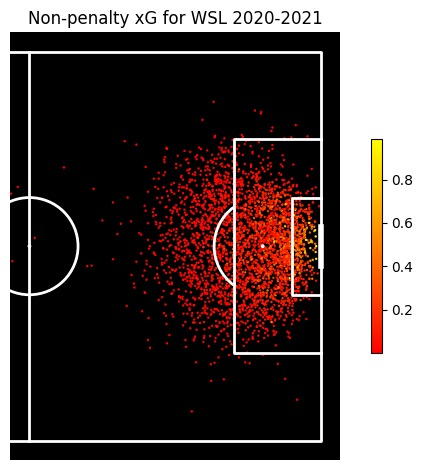

In [28]:
pitch = Pitch(half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2)
fig, ax = pitch.draw()

xg_scatter = ax.scatter(
    [shot[0] for shot in non_penalty_shots["location"].values],
    [shot[1] for shot in non_penalty_shots["location"].values],
    c=[xG for xG in non_penalty_shots["shot_statsbomb_xg"].values],
    s=0.5,
    cmap="autumn",
)
fig.colorbar(xg_scatter, shrink=0.5)
ax.set_title("Non-penalty xG for WSL 2020-2021")

In [8]:
binned_shots_xg_mean = pitch.bin_statistic(
    x=[shot[0] for shot in non_penalty_shots["location"].values],
    y=[shot[1] for shot in non_penalty_shots["location"].values],
    values=[shot for shot in non_penalty_shots["shot_statsbomb_xg"].values],
    statistic="mean",
    bins=(47, 25),
)

Text(0.5, 1.0, 'Non-penalty average xG for WSL 2020-2021')

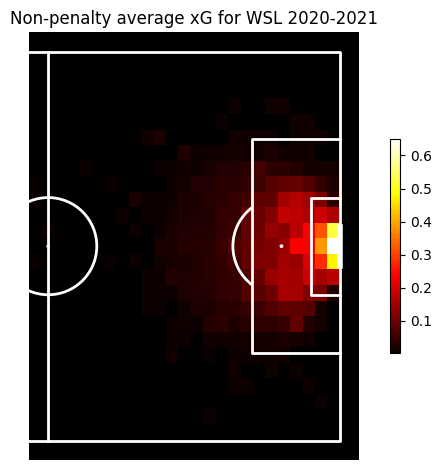

In [19]:
heatmap_pitch = Pitch(
    half=True, pitch_color="#000000", line_color="#ffffff", line_zorder=2
)
fig, ax = heatmap_pitch.draw()
heatmap = pitch.heatmap(binned_shots_xg_mean, ax=ax, cmap="hot")
colourbar = fig.colorbar(heatmap, ax=ax, shrink=0.5)
ax.set_title("Non-penalty average xG for WSL 2020-2021")